In [4]:
import os

# Create OUTPUT directory if it doesn't exist
output_dir = "OUTPUT"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Download the necessary files from GitHub
!wget -P OUTPUT/ https://github.com/rixprakash/Jarheads/raw/main/Project%201/OUTPUT/y.npy
!wget -P OUTPUT/ https://github.com/rixprakash/Jarheads/raw/main/Project%201/OUTPUT/X_embeddings.npy
!wget -P OUTPUT/ https://github.com/rixprakash/Jarheads/raw/main/Project%201/OUTPUT/label_encoder.pkl
!wget -P OUTPUT/ https://github.com/rixprakash/Jarheads/raw/main/Project%201/OUTPUT/logistic_regression_bert.pkl
!wget -P OUTPUT/ https://github.com/rixprakash/Jarheads/raw/main/Project%201/OUTPUT/neural_network_bert.h5


--2025-02-13 13:49:51--  https://github.com/rixprakash/Jarheads/raw/main/Project%201/OUTPUT/y.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rixprakash/Jarheads/main/Project%201/OUTPUT/y.npy [following]
--2025-02-13 13:49:51--  https://raw.githubusercontent.com/rixprakash/Jarheads/main/Project%201/OUTPUT/y.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 227104 (222K) [application/octet-stream]
Saving to: ‘OUTPUT/y.npy’

y.npy               100%[===================>] 221.78K  --.-KB/s    in 0.04s   

2025-02-13 13:49:51 (5.71 MB/s) - ‘OUTPUT/y.npy’ saved [227104/227104]

--2025-02-13 13:

In [5]:
import os

# List contents of OUTPUT folder
print("Verifying downloaded files:")
print(os.listdir("OUTPUT/"))


📂 Verifying downloaded files:
['X_embeddings.npy', 'logistic_regression_bert.pkl', 'neural_network_bert.h5', 'y.npy', 'label_encoder.pkl']


887/887 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step
📄 Genre classification report saved!
📊 Confusion matrices saved!
🎨 PCA visualization saved!


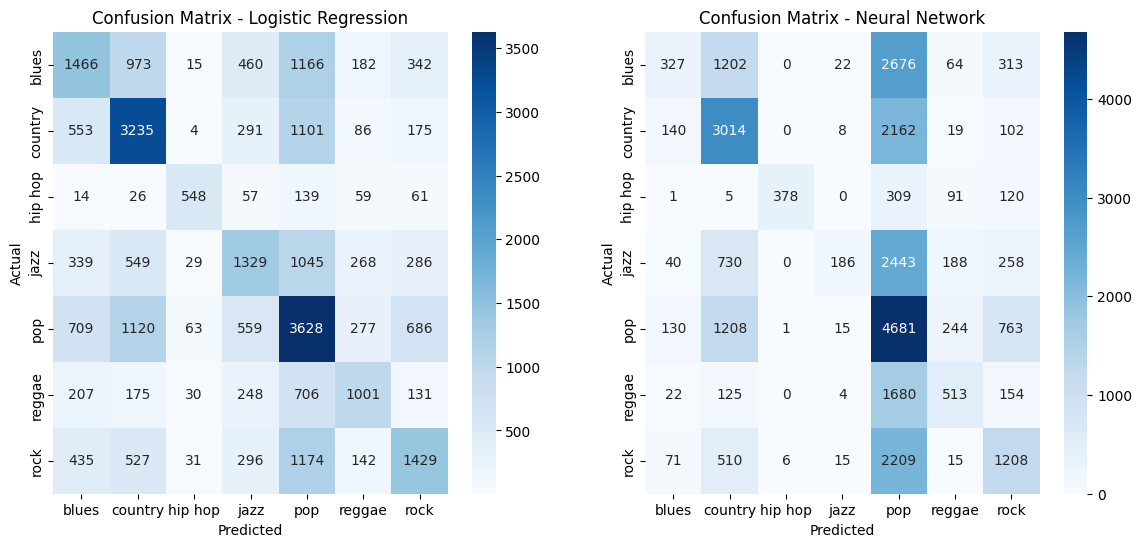

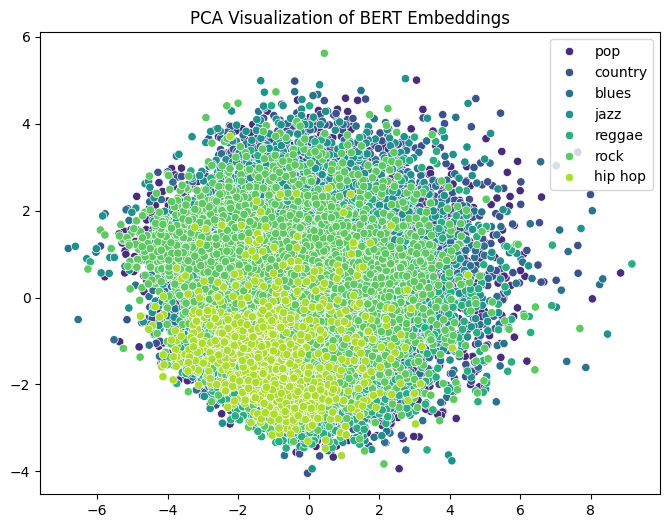

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

# Set the correct path
output_dir = "OUTPUT"

# Load label encoder
y = np.load(os.path.join(output_dir, "y.npy"))
label_encoder = joblib.load(os.path.join(output_dir, "label_encoder.pkl"))
labels = label_encoder.inverse_transform(y)

# Load predictions
logreg_model = joblib.load(os.path.join(output_dir, "logistic_regression_bert.pkl"))
X_embeddings = np.load(os.path.join(output_dir, "X_embeddings.npy"))
logreg_preds = logreg_model.predict(X_embeddings)

# Load Neural Network Model
from tensorflow.keras.models import load_model
nn_model = load_model(os.path.join(output_dir, "neural_network_bert.h5"))
nn_preds = np.argmax(nn_model.predict(X_embeddings), axis=1)

# Classification Report
report = classification_report(y, logreg_preds, target_names=label_encoder.classes_)
with open(os.path.join(output_dir, "genre_classification_report.pdf"), "w") as f:
    f.write(report)
print("Genre classification report saved!")

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(confusion_matrix(y, logreg_preds), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[0])
axes[0].set_title("Confusion Matrix - Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y, nn_preds), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[1])
axes[1].set_title("Confusion Matrix - Neural Network")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.savefig(os.path.join(output_dir, "confusion_matrix.png"))
print("Confusion matrices saved!")

# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_embeddings)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="viridis")
plt.title("PCA Visualization of BERT Embeddings")
plt.savefig(os.path.join(output_dir, "PCA_visualization.png"))
print("PCA visualization saved!")
